# Feature Selection

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Data

In [2]:
df = pd.read_csv('./data/austin_car_crash_cleaned.csv')

In [3]:
display(df.head())
display(df.shape)

,fatal_crash,primary_address,secondary_address,speed_limit,construction_zone,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,...,hour,day_of_week,month,year,day_of_month,weekend,hour_sin,hour_cos,month_sin,month_cos
0,False,2800 N LAMAR BLVD,SAN GABRIEL ST,35.0,False,30.244344,-97.781309,0,0,4,...,13,2,1,2014,8,0,-0.258819,-0.965926,0.5,0.866025
1,False,7500 NOT REPORTED,CONVICT HILL RD,65.0,False,30.216696,-97.848713,0,0,0,...,14,2,1,2014,8,0,-0.500000,-0.866025,0.5,0.866025
2,False,3400 W SLAUGHTER LN LN,SLAUGHTER LN,45.0,False,30.182598,-97.847707,0,0,1,...,8,2,1,2014,22,0,0.866025,-0.500000,0.5,0.866025
3,False,800 CAPITOL OF TEXAS HWY,W LAS CIMAS PKWY,60.0,False,30.290776,-97.828303,0,0,0,...,11,3,1,2014,2,0,0.258819,-0.965926,0.5,0.866025
4,False,14720 STAKED PLAINS LOOP LOOP,MISTY WHITE DR,30.0,False,30.499680,-97.793717,0,0,1,...,5,4,1,2014,17,0,0.965926,0.258819,0.5,0.866025


(159231, 52)

In [4]:
df.columns

Index(['fatal_crash', 'primary_address', 'secondary_address', 'speed_limit',
       'construction_zone', 'latitude', 'longitude', 'sus_serious_injry_cnt',
       'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt',
       'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt',
       'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count',
       'bicycle_death_count', 'bicycle_serious_injury_count',
       'pedestrian_death_count', 'pedestrian_serious_injury_count',
       'motorcycle_death_count', 'motorcycle_serious_injury_count',
       'other_death_count', 'other_serious_injury_count',
       'micromobility_serious_injury_count', 'micromobility_death_count',
       'timestamp_us_central', 'law_enforcement_fatality_count',
       'estimated_total_comprehensive_cost', 'severity_incapacitating_injury',
       'severity_killed', 'severity_non_incapacitating_injury',
       'severity_not_injured', 'severity_possible_injury', 'severity_unknown',
       'unit_involved_bicycle', 'un

## Splitting

In [5]:
from sklearn.model_selection import train_test_split
# Define the target column
target_col = 'estimated_total_comprehensive_cost'

# Split into features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

## Feature Scaling

In [6]:
column_names = list(df.columns)
print(column_names)

['fatal_crash', 'primary_address', 'secondary_address', 'speed_limit', 'construction_zone', 'latitude', 'longitude', 'sus_serious_injry_cnt', 'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt', 'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count', 'bicycle_death_count', 'bicycle_serious_injury_count', 'pedestrian_death_count', 'pedestrian_serious_injury_count', 'motorcycle_death_count', 'motorcycle_serious_injury_count', 'other_death_count', 'other_serious_injury_count', 'micromobility_serious_injury_count', 'micromobility_death_count', 'timestamp_us_central', 'law_enforcement_fatality_count', 'estimated_total_comprehensive_cost', 'severity_incapacitating_injury', 'severity_killed', 'severity_non_incapacitating_injury', 'severity_not_injured', 'severity_possible_injury', 'severity_unknown', 'unit_involved_bicycle', 'unit_involved_large_passenger_vehicle', 'unit_involved_motor_vehicle_other', 'unit_involved_motorcycle', '

In [7]:
print(len(column_names))

52


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
numeric_cols_to_scale = [
    'speed_limit', 'latitude', 'longitude', 'sus_serious_injry_cnt',
    'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt',
    'tot_injry_cnt', 'death_cnt', 'motor_vehicle_death_count',
    'motor_vehicle_serious_injury_count', 'bicycle_death_count',
    'bicycle_serious_injury_count', 'pedestrian_death_count',
    'pedestrian_serious_injury_count', 'motorcycle_death_count',
    'motorcycle_serious_injury_count', 'other_death_count',
    'other_serious_injury_count', 'micromobility_serious_injury_count',
    'micromobility_death_count', 'law_enforcement_fatality_count',
    'severity_incapacitating_injury', 'severity_killed',
    'severity_non_incapacitating_injury', 'severity_not_injured',
    'severity_possible_injury', 'severity_unknown', 'unit_involved_bicycle',
    'unit_involved_large_passenger_vehicle', 'unit_involved_motor_vehicle_other',
    'unit_involved_motorcycle', 'unit_involved_other_unknown',
    'unit_involved_passenger_car', 'unit_involved_pedestrian', 'hour',
    'day_of_week', 'month', 'year', 'day_of_month', 'weekend', 'hour_sin',
    'hour_cos', 'month_sin', 'month_cos'
]

# Only scale features in X_train, not the target variable y
X_train_numeric = X_train[numeric_cols_to_scale]

# Apply scaling to the numeric features
scaler = StandardScaler()
scaler.fit(X_train_numeric)
X_train_scaled_numeric = scaler.transform(X_train_numeric)

# Create a new DataFrame with the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols_to_scale, index=X_train.index)

# Identify columns that were NOT scaled (e.g., categorical or ID columns)
cols_not_scaled = [col for col in X_train.columns if col not in numeric_cols_to_scale]

# Combine the scaled and unscaled columns
X_train_scaled = pd.concat([X_train_scaled_df, X_train[cols_not_scaled]], axis=1)


In [9]:
X_test_numeric = X_test[numeric_cols_to_scale]

X_test_numeric_scaled = scaler.transform(X_test_numeric) 

X_test_df = pd.DataFrame(X_test_numeric, columns = numeric_cols_to_scale, index = X_test.index) 

X_test_scaled = pd.concat([X_test_df, X_test[cols_not_scaled]], axis = 1)

display(X_test_scaled)

,speed_limit,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,...,weekend,hour_sin,hour_cos,month_sin,month_cos,fatal_crash,primary_address,secondary_address,construction_zone,timestamp_us_central
7024,60.0,30.352468,-97.795318,0,0,0,1,1,0,0,...,0,1.000000,6.123234e-17,5.000000e-01,-8.660254e-01,False,COURTYARD DR DR,NOT REPORTED,False,2014-05-14 06:19:00
119493,60.0,30.303633,-97.714132,0,0,1,0,0,1,0,...,1,1.000000,6.123234e-17,-5.000000e-01,8.660254e-01,False,6700 N IH 35 SB,N IH 35 TO E 51ST EXIT,True,2018-11-03 06:45:00
123627,35.0,30.315354,-97.741575,0,0,0,5,0,0,0,...,0,-0.965926,-2.588190e-01,1.000000e+00,6.123234e-17,False,W W 45TH ST ST,BURNET RD RD,False,2023-03-24 17:28:00
18260,40.0,30.403155,-97.700372,0,0,2,1,0,2,0,...,1,-1.000000,-1.836970e-16,8.660254e-01,5.000000e-01,False,12000 METRIC BLVD,12000 BITTERN HOLLOW,False,2016-02-21 18:22:00
35855,75.0,30.476236,-97.765419,0,0,1,1,0,1,0,...,0,-0.965926,2.588190e-01,8.660254e-01,5.000000e-01,False,14000 W SH 45,9100 W PARMER LN,False,2017-02-02 19:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93942,60.0,30.314090,-97.826696,0,0,0,1,0,0,0,...,0,-0.707107,7.071068e-01,-5.000000e-01,-8.660254e-01,False,N CAPITAL OF TEXAS HWY,PASCAL LN,False,2022-07-25 21:40:00
32043,35.0,30.224305,-97.770872,0,0,0,2,0,0,0,...,0,0.500000,-8.660254e-01,-2.449294e-16,1.000000e+00,False,4200 S 1ST ST,500 RADAM LN,False,2016-12-01 10:39:00
52431,60.0,30.335055,-97.607665,0,0,1,1,0,1,0,...,0,-0.258819,-9.659258e-01,5.000000e-01,8.660254e-01,False,9600 E E US 290 HWY SVRD WB HWY,E HARRIS BRANCH PKWY PKWY,False,2019-01-28 13:21:00
106839,55.0,30.218421,-97.691045,0,0,1,0,1,1,0,...,0,0.965926,-2.588190e-01,-5.000000e-01,8.660254e-01,False,7600 E SH 71,RIVERSIDE DR,False,2015-11-10 07:57:00


In [10]:
print(X_train_scaled.dtypes)

speed_limit                              float64
latitude                                 float64
longitude                                float64
sus_serious_injry_cnt                    float64
nonincap_injry_cnt                       float64
poss_injry_cnt                           float64
non_injry_cnt                            float64
unkn_injry_cnt                           float64
tot_injry_cnt                            float64
death_cnt                                float64
motor_vehicle_death_count                float64
motor_vehicle_serious_injury_count       float64
bicycle_death_count                      float64
bicycle_serious_injury_count             float64
pedestrian_death_count                   float64
pedestrian_serious_injury_count          float64
motorcycle_death_count                   float64
motorcycle_serious_injury_count          float64
other_death_count                        float64
other_serious_injury_count               float64
micromobility_seriou

# Columns removal

Need to drop columns with d type object prior to feature selection...

In [11]:
# columns cointiang dtype as object
columns_to_drop = ['primary_address', 'secondary_address', 'timestamp_us_central']
X_train_cleaned = X_train_scaled.drop(columns=columns_to_drop)

In [12]:

import statsmodels.api as sm

# Statsmodel requires you add column of 1s to X 

X_train_cleaned = pd.DataFrame(X_train_cleaned, columns = X_train_cleaned.columns).reset_index(drop = True) # we reset index because sometimes with scaling it can mess up index
y_train = y_train.reset_index(drop = True) # already a dataframe, X_train_scaled isn't because it was converted to array due to StandardScaler

X_train_sig = sm.add_constant(X_train_cleaned) # sm has built in method to add intercept multplier


In [13]:
X_train_sig.dtypes

# will have to convert booleans to numerics for backward elimination 

const                                    float64
speed_limit                              float64
latitude                                 float64
longitude                                float64
sus_serious_injry_cnt                    float64
nonincap_injry_cnt                       float64
poss_injry_cnt                           float64
non_injry_cnt                            float64
unkn_injry_cnt                           float64
tot_injry_cnt                            float64
death_cnt                                float64
motor_vehicle_death_count                float64
motor_vehicle_serious_injury_count       float64
bicycle_death_count                      float64
bicycle_serious_injury_count             float64
pedestrian_death_count                   float64
pedestrian_serious_injury_count          float64
motorcycle_death_count                   float64
motorcycle_serious_injury_count          float64
other_death_count                        float64
other_serious_injury

In [14]:
import statsmodels.api as sm

def backwards_elimination(X_train_cleaned, y_train, significance_level = 0.05): 
    X_opt = X_train_cleaned.copy()  # Make a copy of the training data to avoid modifying the original
    removed_features = []
    
    # Ensure all columns are numeric, and convert boolean columns to 0 and 1
    X_opt = X_opt.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns
    bool_columns = X_opt.select_dtypes(include=['bool']).columns
    X_opt[bool_columns] = X_opt[bool_columns].astype(int)  # Convert booleans to 0 and 1
    
    # Add constant column for the intercept
    X_opt = sm.add_constant(X_opt)
    
    while True: 
        obj_OLS = sm.OLS(y_train, X_opt).fit()  # Fit the OLS model
        p_values = obj_OLS.pvalues  # Get the p-values from the model
        
        max_p_value = p_values.max()  # Find the maximum p-value
        
        if max_p_value > significance_level:  # If the max p-value is greater than the significance level
            feature_to_remove = p_values.idxmax()  # Identify the feature with the highest p-value
            removed_features.append(feature_to_remove)  # Add it to the removed features list
            X_opt.drop(columns=[feature_to_remove], inplace=True)  # Drop the feature
        else:
            break  # If no feature has a p-value greater than the significance level, stop
        
        # Avoid infinite loop if no features are removed
        if not removed_features:
            break
    
    print("Final Model Summary:\n", obj_OLS.summary())
    print("\nEliminated Features:", removed_features)
    
    return X_opt, obj_OLS

# Apply backwards elimination
X_train_selected, final_model = backwards_elimination(X_train_cleaned, y_train)


Final Model Summary:
                                     OLS Regression Results                                    
Dep. Variable:     estimated_total_comprehensive_cost   R-squared:                       1.000
Model:                                            OLS   Adj. R-squared:                  1.000
Method:                                 Least Squares   F-statistic:                 5.410e+08
Date:                                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                                        22:43:48   Log-Likelihood:            -1.1695e+06
No. Observations:                              127384   AIC:                         2.339e+06
Df Residuals:                                  127360   BIC:                         2.339e+06
Df Model:                                          23                                         
Covariance Type:                            nonrobust                                         
                            

In [15]:
X_train_selected.columns

Index(['const', 'speed_limit', 'latitude', 'longitude',
       'sus_serious_injry_cnt', 'nonincap_injry_cnt', 'poss_injry_cnt',
       'non_injry_cnt', 'unkn_injry_cnt', 'death_cnt',
       'motor_vehicle_death_count', 'severity_incapacitating_injury',
       'severity_non_incapacitating_injury', 'severity_not_injured',
       'severity_possible_injury', 'severity_unknown',
       'unit_involved_motor_vehicle_other', 'unit_involved_motorcycle',
       'unit_involved_passenger_car', 'hour', 'weekend', 'hour_sin',
       'hour_cos', 'month_cos'],
      dtype='object')

# LASSO 

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_cleaned, y_train) 

Lasso()

In [17]:
lasso.coef_

array([-3.03018757e+01, -1.88675871e+01,  2.20360646e+01,  6.49083523e+05,
        1.48511471e+05,  1.37033740e+05,  3.33117202e+04,  6.91209070e+03,
        1.81232383e+04,  2.79813687e+05,  2.44798558e+01, -8.02470542e+03,
       -9.66034492e+00, -2.49750549e+03, -2.55005693e+01, -2.61387441e+03,
       -1.83145727e+01, -3.18721319e+03,  0.00000000e+00, -1.71627032e+02,
        0.00000000e+00,  0.00000000e+00,  5.04671807e+00, -8.71683018e+01,
        4.20419480e+02, -2.07552116e+02, -4.60141519e+02, -3.15549324e+02,
        9.11064116e+02, -1.06289879e+01,  5.95325617e+00,  3.07076698e+01,
       -2.50888849e+01, -1.06103262e+01, -1.22352916e+01, -0.00000000e+00,
       -6.17500824e+01,  5.84120623e+00, -6.21296749e+00, -1.21259695e+01,
       -1.53248980e+00,  4.05357338e+01, -3.00292300e+01,  4.17699281e+01,
       -4.50969512e-01, -1.55506787e+01, -0.00000000e+00, -0.00000000e+00])

In [18]:
lasso_selected_features = np.where(lasso.coef_ != 0)[0]  # Selecting the indices where lasso gives feature coefficient a 0

print(lasso_selected_features)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 22 23 24 25 26
 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45]


In [19]:
lasso_selected_feature_names = X_train.columns[lasso_selected_features]

print(lasso_selected_feature_names)

Index(['fatal_crash', 'primary_address', 'secondary_address', 'speed_limit',
       'construction_zone', 'latitude', 'longitude', 'sus_serious_injry_cnt',
       'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt',
       'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt',
       'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count',
       'bicycle_death_count', 'bicycle_serious_injury_count',
       'pedestrian_serious_injury_count', 'other_death_count',
       'other_serious_injury_count', 'micromobility_serious_injury_count',
       'micromobility_death_count', 'timestamp_us_central',
       'law_enforcement_fatality_count', 'severity_incapacitating_injury',
       'severity_killed', 'severity_non_incapacitating_injury',
       'severity_not_injured', 'severity_possible_injury', 'severity_unknown',
       'unit_involved_bicycle', 'unit_involved_motor_vehicle_other',
       'unit_involved_motorcycle', 'unit_involved_other_unknown',
       'unit_involved_passenger_car', '

# PCA 

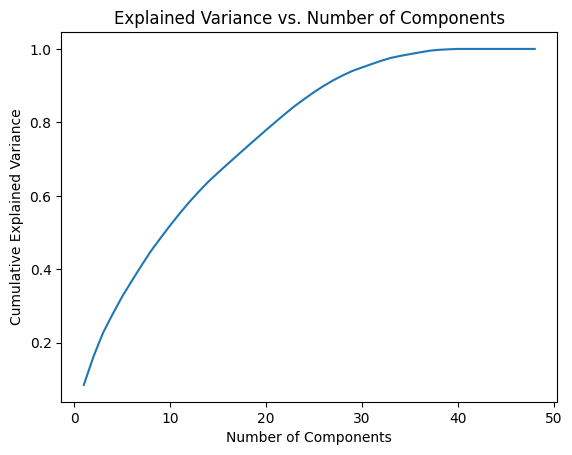

Number of components to retain 95% variance: 31


In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Fit PCA model
pca = PCA()
pca.fit(X_train_cleaned)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot cumulative variance
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# Find the number of components for 95% variance
components_needed = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {components_needed}")
